In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [13]:
features = [
    'person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
    'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
    'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length'
]
target = 'loan_status'

X = data[features].copy()
y = data[target]

In [14]:
label_encoders = {}
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [15]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [16]:
correlation_matrix = pd.DataFrame(X_imputed, columns=features).corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            person_age  person_income  person_home_ownership  \
person_age                    1.000000       0.173202              -0.032506   
person_income                 0.173202       1.000000              -0.203177   
person_home_ownership        -0.032506      -0.203177               1.000000   
person_emp_length             0.161159       0.133360              -0.228856   
loan_intent                   0.035518       0.001527               0.011004   
loan_grade                    0.014218      -0.001022               0.120438   
loan_amnt                     0.050787       0.266820              -0.130776   
loan_int_rate                 0.011873       0.000752               0.133496   
loan_percent_income          -0.042411      -0.254471               0.142129   
cb_person_default_on_file     0.005807      -0.003613               0.063004   
cb_person_cred_hist_length    0.859133       0.117987              -0.025534   

                   

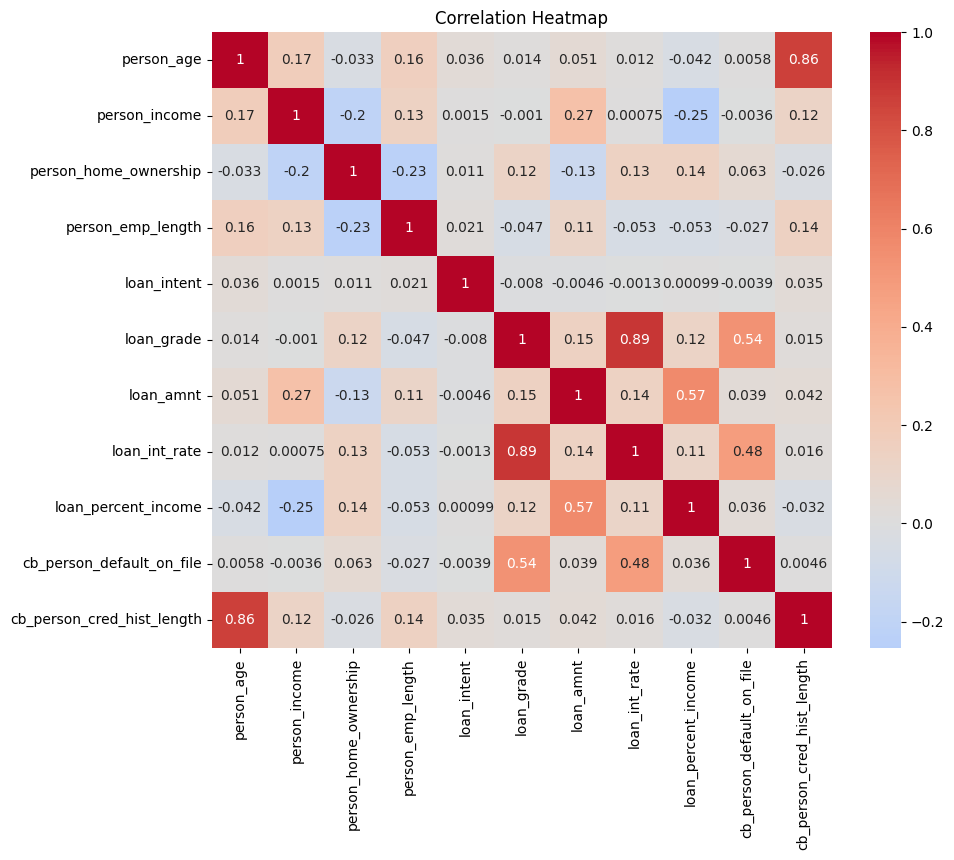

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(X_test_scaled)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [24]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.877397575571582
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5072
           1       0.81      0.59      0.68      1445

    accuracy                           0.88      6517
   macro avg       0.85      0.77      0.80      6517
weighted avg       0.87      0.88      0.87      6517



In [25]:
example_data = [
    [35, 80000, 'MORTGAGE', 10, 'DEBTCONSOLIDATION', 'B', 15000, 7.5, 0.18, 'Y', 8]
]
example_data_encoded = np.array(example_data)
for col in [2, 4, 5, 9]:
    le = label_encoders[features[col]]
    example_data_encoded[0, col] = le.transform([example_data[0][col]])[0]
example_data_imputed = imputer.transform(example_data_encoded)
example_data_scaled = scaler.transform(example_data_imputed)

predicted_status = knn_model.predict(example_data_scaled)
print(f"Predicted Loan Status: {predicted_status}")

Predicted Loan Status: [0]


C:\Users\mrrah\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [29]:
example_data = [
    [22, 59000, 'RENT', 23, 'PERSONAL', 'D', 35000, 16.02, 0.59, 'Y', 3]
]
example_data_encoded = np.array(example_data)
for col in [2, 4, 5, 9]:
    le = label_encoders[features[col]]
    example_data_encoded[0, col] = le.transform([example_data[0][col]])[0]
example_data_imputed = imputer.transform(example_data_encoded)
example_data_scaled = scaler.transform(example_data_imputed)

predicted_status = knn_model.predict(example_data_scaled)
print(f"Predicted Loan Status: {predicted_status}")

Predicted Loan Status: [1]


C:\Users\mrrah\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


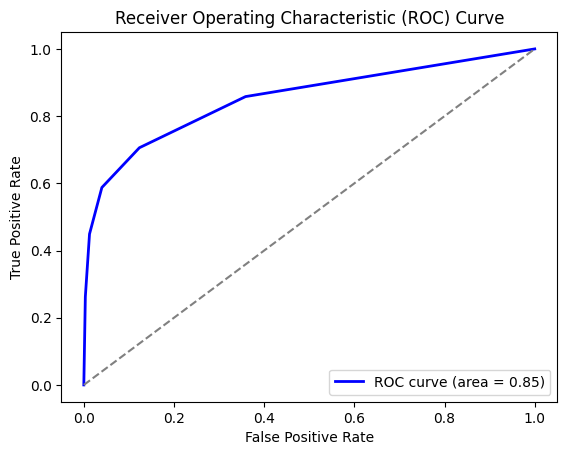

In [25]:
y_scores = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

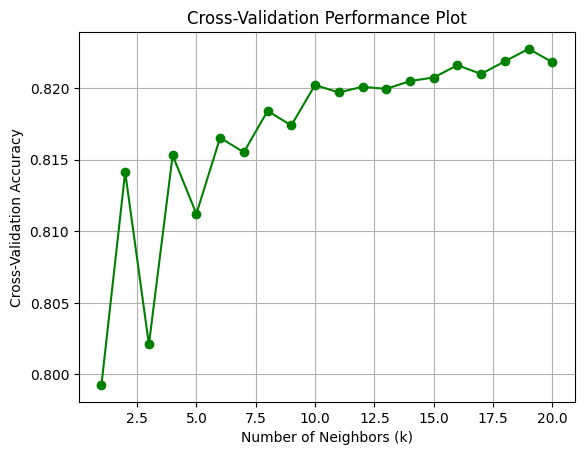

In [26]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_imputed, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(k_values, cv_scores, marker='o', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Performance Plot')
plt.grid()
plt.show()